<a href="https://colab.research.google.com/github/LuizVicenteJr/Cardio-disease/blob/main/cardio_diseases_cicle3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 IMPORTS

In [ ]:
import warnings
warnings.simplefilter('ignore')

import time
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotly.graph_objects as go
from plotly.subplots import make_subplots 
import plotly.express as px

from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
import xgboost as xgb

import pickle
from google.colab import drive
pd.set_option('display.max_columns', None)

## 0.1 LOAD DATA

In [ ]:
data = pd.read_csv('/content/cardio_train.csv',sep=';')

# 1.0 DATA DESCRIPTION

In [ ]:
df1 = data.copy()

## 1.1 DATA DIMENSIONS

In [ ]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 70000
Number of Cols: 13


## 1.2 Data Types

In [ ]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3 Check NA

In [ ]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4 Descriptive Statistics

In [ ]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )

### 1.4.1 NUMERICAL ATTRIBUTES

In [ ]:
# Central Tendency 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion 
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,99999.0,99999.0,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
1,age,10798.0,23713.0,12915.0,19468.865814,19703.0,2467.234044,-0.307055,-0.823447
2,gender,1.0,2.0,1.0,1.349571,1.0,0.476835,0.630960,-1.601935
3,height,55.0,250.0,195.0,164.359229,165.0,8.210068,-0.642187,7.943653
4,weight,10.0,200.0,190.0,74.205690,72.0,14.395654,1.012070,2.586825
5,ap_hi,-150.0,16020.0,16170.0,128.817286,120.0,154.010319,85.296214,7580.074738
6,ap_lo,-70.0,11000.0,11070.0,96.630414,80.0,188.471184,32.114083,1425.914585
7,cholesterol,1.0,3.0,2.0,1.366871,1.0,0.680245,1.587123,0.993901
8,gluc,1.0,3.0,2.0,1.226457,1.0,0.572266,2.397462,4.294377
9,smoke,0.0,1.0,1.0,0.088129,0.0,0.283482,2.905867,6.444250


*  age = age of person in days
* height = height of person in cm
* weight = weight of person in kg
* ap_hi = systolic blood pressure , normal value = 120 mmhg
* ap_lo = diastolic blood pressure , normal value = 80 mmhg
* cholesterol = adults normal value = 200 mg/dL, children normal value = 170 mg/dL

* gluc = glucose level , normal value = 70 ~80 mg/dL
* smoke = 0 : 'Not a Smoker', 1 : 'Smoker'
* alco = 0 : 'Not a Alchoalic', 1 : 'Alchoalic'
* active = 0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'

* cardio = 0 : 'Not Have Cardiovascular diseases', 1 : 'Have Cardiovascular diseases'

# 2.0 EDA

In [ ]:
df2= df1.copy()

## TARGET

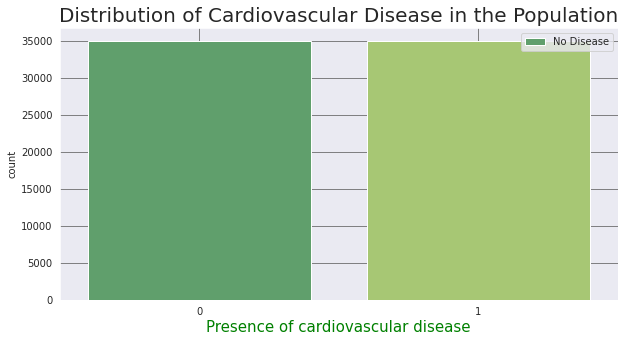

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(df2['cardio'], palette='summer')
plt.xlabel('Presence of cardiovascular disease', fontdict={'fontsize': 15,'color':'Green'}, labelpad=3)
plt.title('Distribution of Cardiovascular Disease in the Population', fontsize=20)
plt.legend(['No Disease', 'Disease'])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## GENDER

peso médio das mulheres menor que o peso médio dos homens 

In [ ]:
a = df2[df2["gender"]==2]["height"].mean()
b = df2[df2["gender"]==1]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender 2 is " + gender + " e Gender 1 is " + gender1)

Gender 2 is male e Gender 1 is female


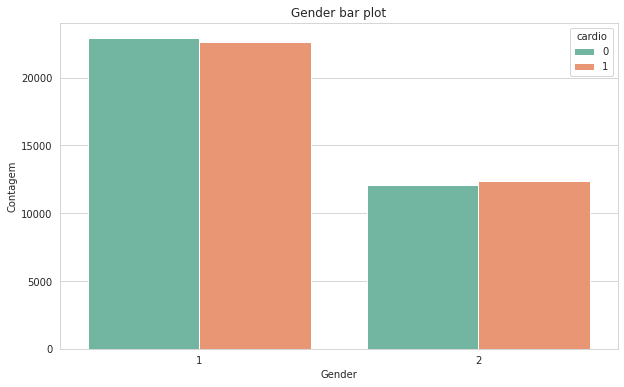

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='cardio', data=df2, palette="Set2")

plt.title("Gender bar plot")
plt.xlabel("Gender")
plt.ylabel("Contagem")


plt.show()

## 2.1 Height

### 2.1.1 BOXPLOT

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=df2['height'],name = 'Height(cm)', boxpoints='outliers',line_color='blue'))
fig.update_layout(title = 'Distribution of Height',xaxis_title='Height (cm)')
fig.show()

In [ ]:
df2[(df2['height'] <= 100) | (df2['height'] >= 230)].shape

(33, 13)

In [ ]:
#data filter
df2 = df2[~((df2['height'] <= 100) | (df2['height'] >= 230))]

### 2.1.2 VIOLIN PLOT

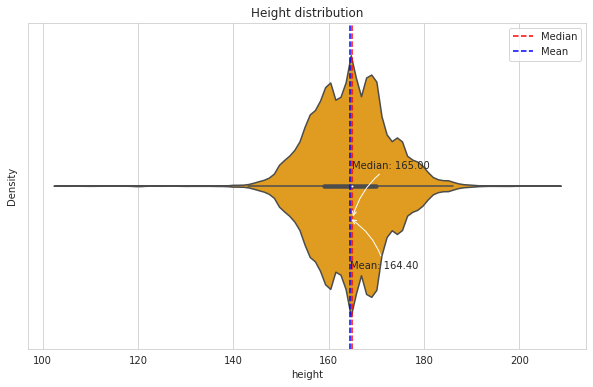

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df2['height'], color='orange', ax=ax)

median = df2['height'].median()
mean = df2['height'].mean()
plt.title("Height distribution")
plt.xlabel("height")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

## 2.2 Weight

### 2.2.1 BOXPLOT

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=df2['weight'], name = 'Weight', boxpoints='outliers',line_color='blue'))
fig.update_layout(title = 'Distribution of Weight',xaxis_title='Weight (kg)')
fig.show()

In [ ]:
df2[(df2['weight'] <= 35)].shape

(22, 13)

In [ ]:
#data filter
df2 = df2[~((df2['weight'] <= 35))]

### 2.2.2 VIOLIN PLOT

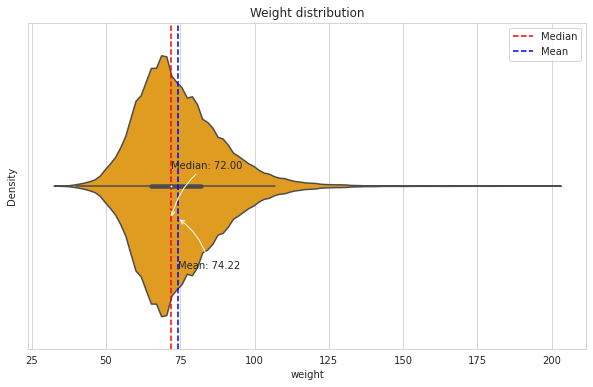

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df2['weight'], color='orange', ax=ax)

median = df2['weight'].median()
mean = df2['weight'].mean()
plt.title("Weight distribution")
plt.xlabel("weight")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

## 2.3 Age

In [ ]:
df2['age'] = df2['age'] / 365 # days for years
df2['age'] = df2['age'].round(1)

### 2.3.1 BOX PLOT

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=df2['age'], name = 'Age', boxpoints='outliers',line_color='blue'))
fig.update_layout(title = 'Age distribution',xaxis_title='Age (years)')
fig.show()

### 2.3.2 VIOLIN PLOT

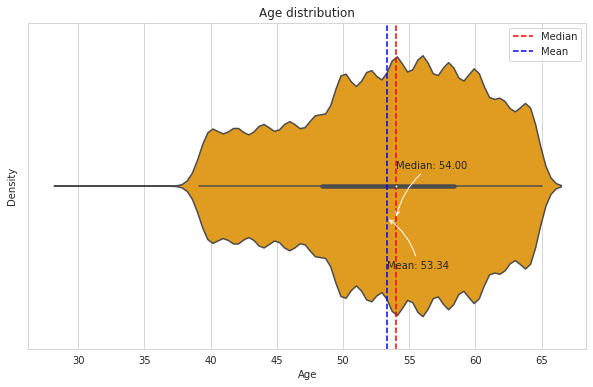

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df2['age'], color='orange', ax=ax)

median = df2['age'].median()
mean = df2['age'].mean()
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

## 2.4 ap_hi (systolic blood pressure)

### 2.4.1 BOXPLOT

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=df2['ap_hi'], name = 'ap_hi', boxpoints='outliers',))
fig.update_layout(title_text="Systolic blood pressure")
fig.show()

In [ ]:
#data filter
df2 = df2[~((df2['ap_hi'] <= 60) | (df2['ap_hi'] >= 240))]

### 2.4.2 VIOLIN PLOT

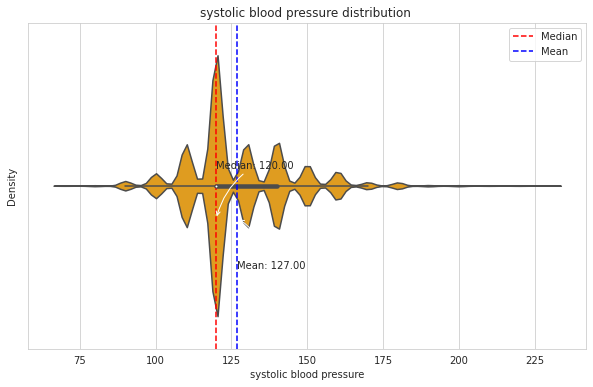

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df2['ap_hi'], color='orange', ax=ax)

median = df2['ap_hi'].median()
mean = df2['ap_hi'].mean()
plt.title("systolic blood pressure distribution ")
plt.xlabel("systolic blood pressure")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

## 2.5 ap_lo
     

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=df2['ap_lo'], name = 'ap_Lo', boxpoints='outliers',))
fig.update_layout(title_text="Diastolic blood pressure")
fig.show()

In [ ]:
#data filter
df2 = df2[~((df2['ap_lo'] <= 40) | (df2['ap_lo'] >= 160))]

### VIOLIN PLOT

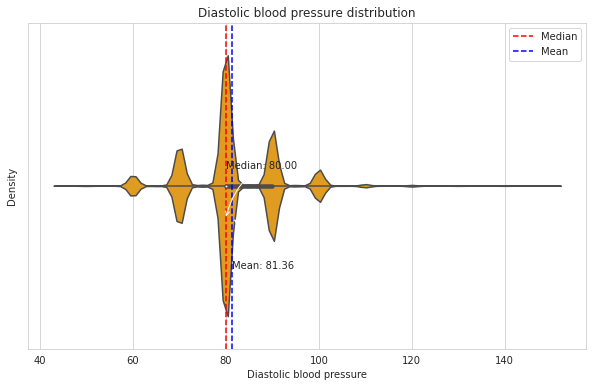

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df2['ap_lo'], color='orange', ax=ax)

median = df2['ap_lo'].median()
mean = df2['ap_lo'].mean()
plt.title("Diastolic blood pressure distribution")
plt.xlabel("Diastolic blood pressure")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

## cholesterol

In [ ]:
df2['cholesterol']=df2['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})

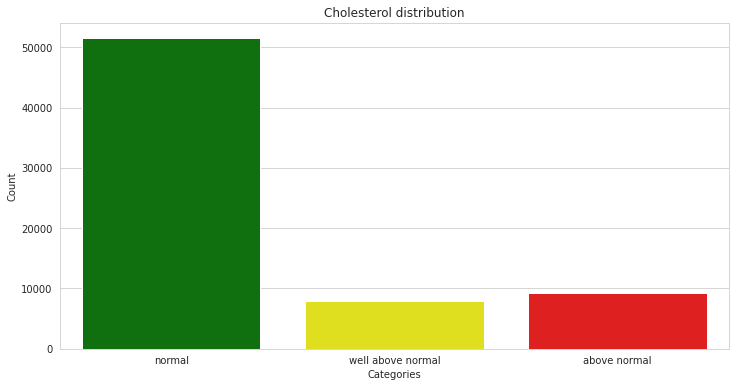

In [ ]:
sns.countplot(x='cholesterol', data=df2, palette=['green', 'yellow', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Cholesterol distribution')

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

## 2.6 GLUC


In [ ]:
df2['gluc']=df2['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})

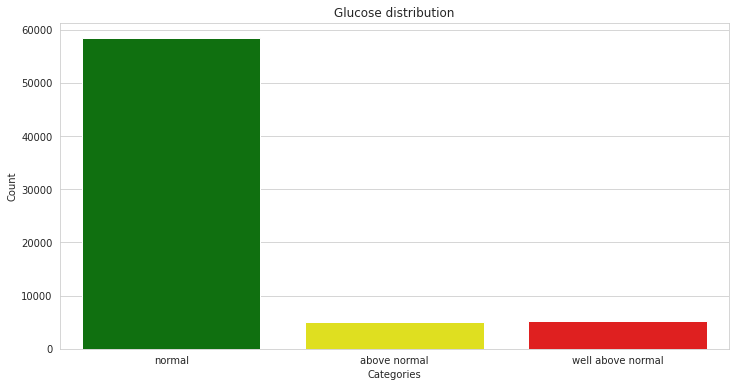

In [ ]:
sns.countplot(x='gluc', data=df2, palette=['green', 'yellow', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Glucose distribution')

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

## 2.7 SMOKE

In [ ]:
df2['smoke']=df2['smoke'].map({ 0: 'not a smoker', 1: 'smoker'})

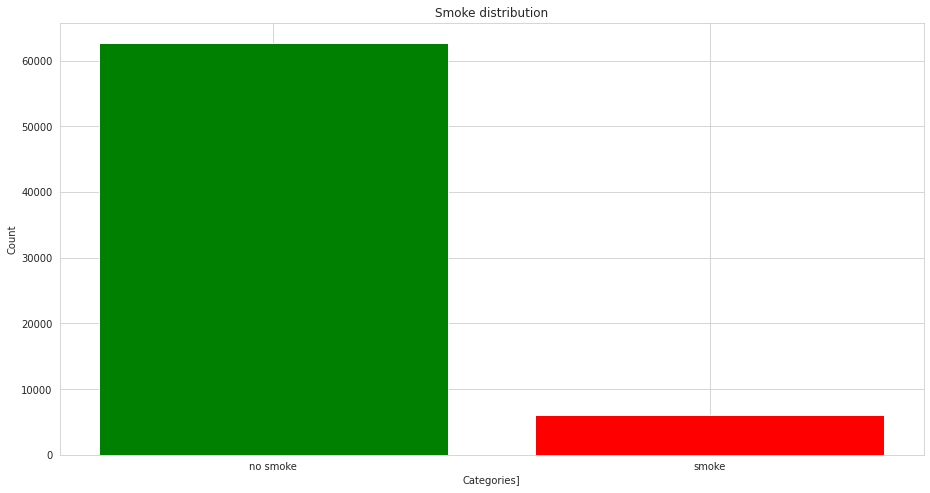

In [ ]:
glucose = df2['smoke'].value_counts()
categories = ['no smoke', 'smoke']
colors = ['green','red']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, glucose , color= colors)

plt.xlabel('Categories]')
plt.ylabel('Count')
plt.title('Smoke distribution')

plt.show()

## 2.8 ALCO

In [ ]:
df2['alco']=df2['alco'].map({ 0: 'no drink', 1: 'drink'})

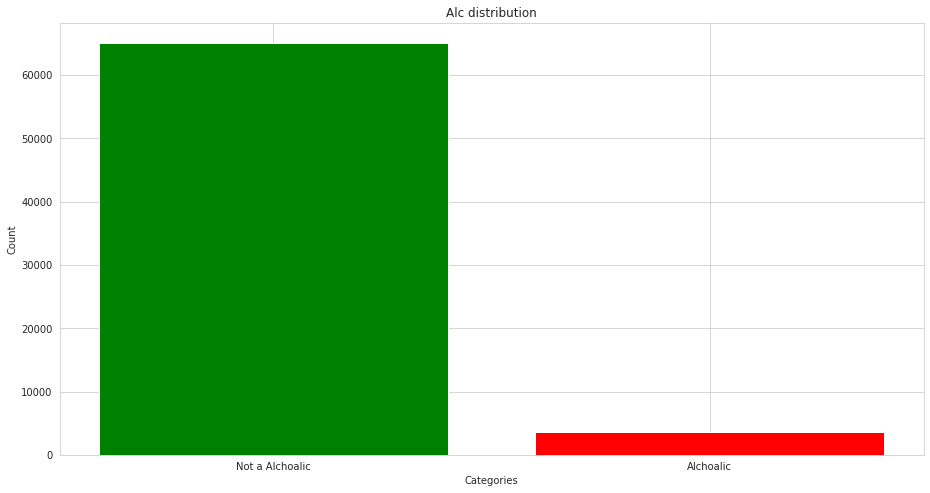

In [ ]:
glucose = df2['alco'].value_counts()
categories = ['Not a Alchoalic', 'Alchoalic']
colors = ['green','red']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, glucose , color= colors)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Alc distribution')

plt.show()

## 2.9 ACTIVE

In [ ]:
df2['active']=df2['active'].map({ 0: 'no active', 1: 'active'})

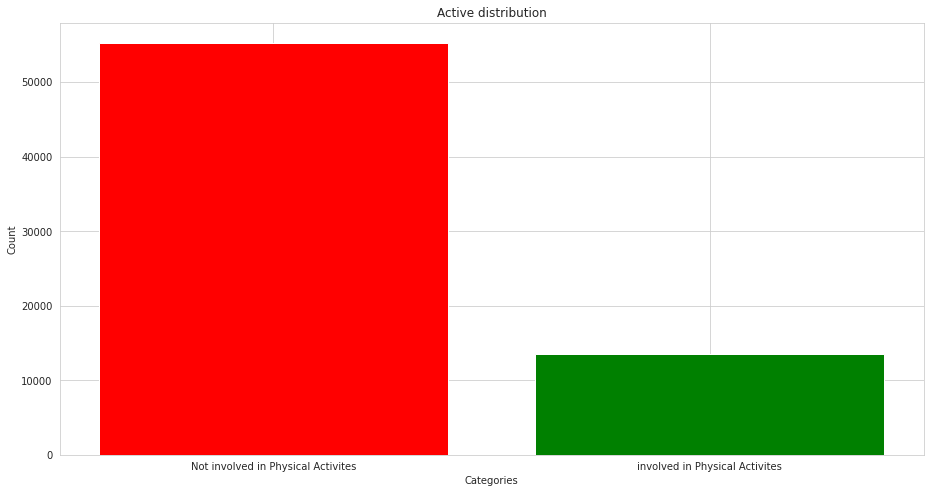

In [ ]:
glucose = df2['active'].value_counts()
categories = ['Not involved in Physical Activites', 'involved in Physical Activites']
colors = ['red','green']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, glucose , color= colors)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Active distribution')

plt.show()

# 3.0 DATA FILTER

In [ ]:
df3 = df2.drop('id',axis=1).copy()
print(df3.shape)

(68682, 12)


## 3.1 DUPLICATED COLUMNS

In [ ]:
duplicates = df3.duplicated()
print(duplicates.value_counts())

df3 = df3.drop_duplicates()

print(df3.shape)

False    68017
True       665
dtype: int64
(68017, 12)


# 4.0 PREPROCESSING

## 4.1 OUTLIERS

In [ ]:
df4 = df3.copy()

In [ ]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {} and No of Data is {}'.format(each_feature, len(outliers),df4[each_feature].shape[0]))
outliers(df4[['weight','age','ap_hi','ap_lo']])

For the feature weight, No of Outliers is 1722 and No of Data is 68017
For the feature age, No of Outliers is 4 and No of Data is 68017
For the feature ap_hi, No of Outliers is 1051 and No of Data is 68017
For the feature ap_lo, No of Outliers is 3548 and No of Data is 68017


## 4.2 GET DUMMIES

In [ ]:
# Codificar as variáveis categóricas usando one-hot encoding
cholesterol_encoded = pd.get_dummies(df4['cholesterol'], prefix='cholesterol')
gluc_encoded = pd.get_dummies(df4['gluc'], prefix='gluc')
smoke_encoded = pd.get_dummies(df4['smoke'], prefix='smoke')
alco_encoded = pd.get_dummies(df4['alco'], prefix='alco')
active_encoded = pd.get_dummies(df4['active'], prefix='active')

# Concatenar as novas colunas ao dataframe original
df_encoded = pd.concat([df4, cholesterol_encoded, gluc_encoded, smoke_encoded, alco_encoded, active_encoded], axis=1)

# Remover as colunas originais das variáveis categóricas
df4 = df_encoded.drop(['cholesterol', 'gluc', 'smoke', 'alco', 'active'], axis=1)

In [ ]:
df4

,age,gender,height,weight,ap_hi,ap_lo,cardio,cholesterol_above normal,cholesterol_normal,cholesterol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal,smoke_not a smoker,smoke_smoker,alco_drink,alco_no drink,active_active,active_no active
0,50.4,2,168,62.0,110,80,0,0,1,0,0,1,0,1,0,0,1,1,0
1,55.4,1,156,85.0,140,90,1,0,0,1,0,1,0,1,0,0,1,1,0
2,51.7,1,165,64.0,130,70,1,0,0,1,0,1,0,1,0,0,1,0,1
3,48.3,2,169,82.0,150,100,1,0,1,0,0,1,0,1,0,0,1,1,0
4,47.9,1,156,56.0,100,60,0,0,1,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.7,2,168,76.0,120,80,0,0,1,0,0,1,0,0,1,0,1,1,0
69996,61.9,1,158,126.0,140,90,1,1,0,0,1,0,0,1,0,0,1,1,0
69997,52.2,2,183,105.0,180,90,1,0,0,1,0,1,0,1,0,1,0,0,1
69998,61.5,1,163,72.0,135,80,1,0,1,0,1,0,0,1,0,0,1,0,1


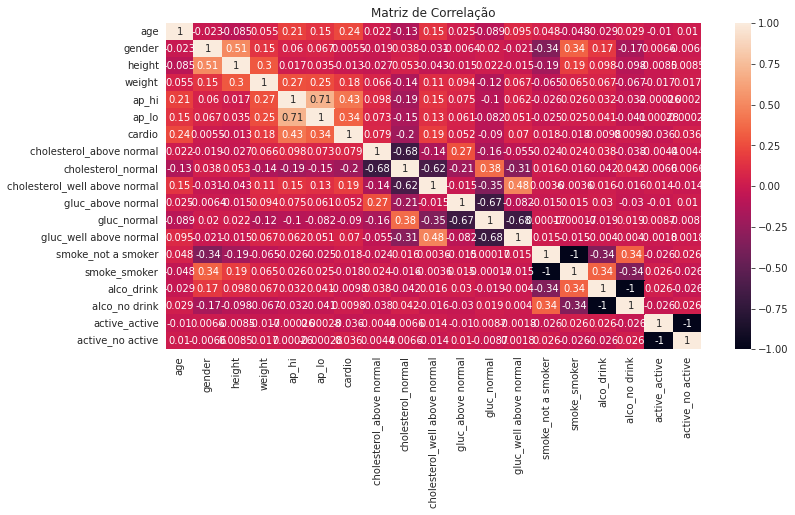

In [ ]:
# Calcule a matriz de correlação
corr = df4.corr()

#tamanho
plt.figure(figsize=(12, 6))
# Plote a matriz de correlação usando o seaborn
sns.heatmap(corr, annot=True)

# Adicione um título ao gráfico
plt.title('Matriz de Correlação')

# Exiba o gráfico
plt.show()

## 4.3 Correlation of Variables

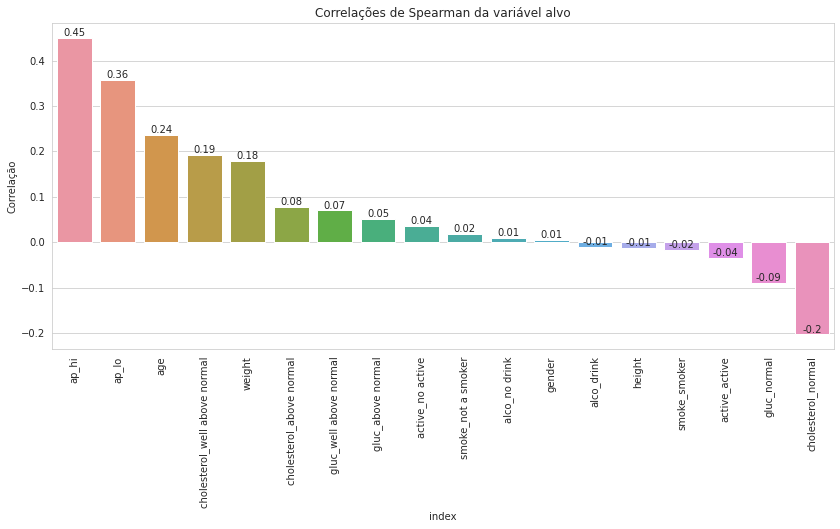

In [ ]:
corr = df4.corr(method='spearman')

# Selecione a linha com as correlações da variável alvo
target_corr = corr.loc['cardio']
target_corr = target_corr.sort_values(ascending=False)
target_corr = target_corr.drop('cardio')
target_corr = pd.DataFrame(target_corr)
target_corr['index'] = target_corr.index
target_corr = target_corr.reset_index(drop=True)

# Crie um gráfico de barras das correlações de Spearman da variável alvo com as outras variáveis
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=target_corr['index'], y=target_corr['cardio'])
plt.title('Correlações de Spearman da variável alvo')
plt.ylabel('Correlação')
plt.xticks(rotation=90)

# Adicione o valor da correlação no final de cada barra
for i, v in enumerate(target_corr['cardio']):
    ax.text(i, v, round(v, 2), ha='center', va='bottom')

plt.show()

# 5.0 MACHINE LEARNING

In [ ]:
final_data = df4.copy()

### 5.1 SPLITTING AND STANDARDIZING DATA

In [ ]:
final_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio',
       'cholesterol_above normal', 'cholesterol_normal',
       'cholesterol_well above normal', 'gluc_above normal', 'gluc_normal',
       'gluc_well above normal', 'smoke_not a smoker', 'smoke_smoker',
       'alco_drink', 'alco_no drink', 'active_active', 'active_no active'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('cardio',axis=1),final_data.cardio,test_size=0.30, random_state=42)

to_be_scaled_feat = ['age', 'ap_hi', 'ap_lo','cholesterol_well above normal','weight','gluc_well above normal','smoke_smoker','alco_drink','active_no active']

scaler=StandardScaler()
scaler.fit(X_train[to_be_scaled_feat])
X_train[to_be_scaled_feat] = scaler.transform(X_train[to_be_scaled_feat])
X_test[to_be_scaled_feat] = scaler.transform(X_test[to_be_scaled_feat])

X_train = X_train[to_be_scaled_feat]
X_test = X_test[to_be_scaled_feat]
     

In [ ]:
X_train

,age,ap_hi,ap_lo,cholesterol_well above normal,weight,gluc_well above normal,smoke_smoker,alco_drink,active_no active
58874,-0.226024,-0.400370,-0.144532,-0.362621,-0.640320,-0.288274,3.209931,4.195869,-0.497235
37773,0.659252,0.197665,0.906307,-0.362621,0.476758,-0.288274,-0.311533,-0.238330,-0.497235
7317,1.308455,1.393737,0.906307,-0.362621,-0.779955,-0.288274,3.209931,4.195869,-0.497235
27203,-0.521117,-0.400370,-0.144532,-0.362621,-0.291233,-0.288274,-0.311533,-0.238330,-0.497235
56284,-1.967068,-0.400370,-0.144532,-0.362621,0.057854,-0.288274,-0.311533,-0.238330,-0.497235
...,...,...,...,...,...,...,...,...,...
38131,0.349405,1.393737,-0.249616,-0.362621,-0.221416,3.468919,-0.311533,-0.238330,2.011121
6391,-0.816209,-0.400370,-0.144532,-0.362621,-0.570503,-0.288274,3.209931,4.195869,-0.497235
56386,-0.063724,-0.400370,-0.144532,-0.362621,-0.570503,-0.288274,-0.311533,-0.238330,-0.497235
875,1.042872,0.197665,-0.144532,2.757701,-0.989407,3.468919,-0.311533,-0.238330,-0.497235


In [ ]:
X_test

,age,ap_hi,ap_lo,cholesterol_well above normal,weight,gluc_well above normal,smoke_smoker,alco_drink,active_no active
31910,-1.657222,-2.194478,-1.195371,-0.362621,-0.011964,-0.288274,-0.311533,-0.23833,-0.497235
64208,-1.730995,-0.998406,-1.195371,-0.362621,0.756028,-0.288274,-0.311533,-0.23833,-0.497235
35814,-1.568694,0.197665,1.957146,-0.362621,-0.221416,-0.288274,-0.311533,-0.23833,-0.497235
35534,0.496952,-0.400370,0.906307,-0.362621,0.127671,-0.288274,-0.311533,-0.23833,-0.497235
18334,-0.535871,-0.400370,-0.144532,-0.362621,0.546575,-0.288274,-0.311533,-0.23833,-0.497235
...,...,...,...,...,...,...,...,...,...
10424,-1.967068,-0.400370,-0.144532,-0.362621,-0.779955,-0.288274,-0.311533,-0.23833,-0.497235
46465,-0.211270,-0.400370,-0.144532,-0.362621,-0.361051,3.468919,-0.311533,-0.23833,-0.497235
22128,0.172350,1.393737,0.906307,-0.362621,1.663654,-0.288274,-0.311533,-0.23833,-0.497235
62089,0.998608,1.991773,0.906307,-0.362621,-0.849772,-0.288274,-0.311533,-0.23833,-0.497235


## 5.2 K-NEAREST NEIGHBORS

Best K: 30
Tempo de execução: 286.62 segundos


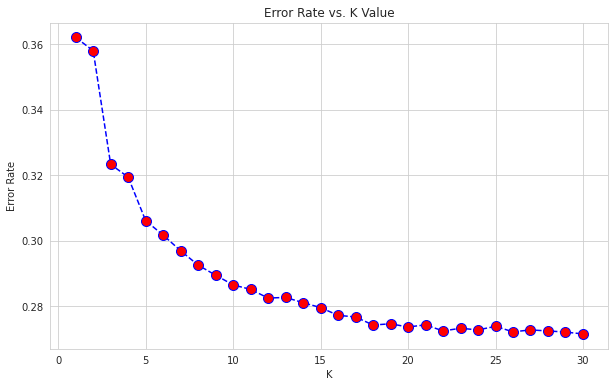

In [ ]:
start_time = time.time()  # Registra o tempo de início

error_rate = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    error_rate.append(1 - np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

best_k = np.argmin(error_rate) + 1
print(f"Best K: {best_k}")

end_time = time.time()  # Registra o tempo de término
total_time = end_time - start_time  # Calcula o tempo total de execução

print("Tempo de execução: {:.2f} segundos".format(total_time))

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10263
           1       0.75      0.67      0.71     10143

    accuracy                           0.72     20406
   macro avg       0.73      0.72      0.72     20406
weighted avg       0.73      0.72      0.72     20406



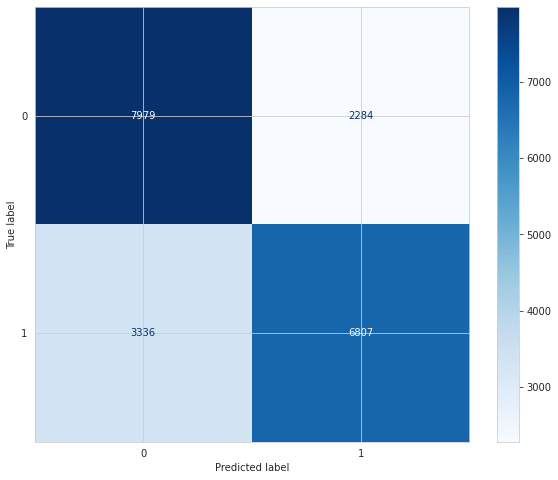

In [ ]:
# Crie a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(best_knn, X_test, y_test, cmap=plt.cm.Blues, values_format='.0f', ax=ax)
plt.show()

In [ ]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)

## 5.3 RANDOM FOREST

In [ ]:
# start_time = time.time()  # Registra o tempo de início

# # Definir os valores para cada hiperparâmetro a serem testados
# param_grid = {'max_depth': [80, 90, 100],
#               'max_features': [2, 3, 4],
#               'min_samples_leaf': [3, 4, 5],
#               'min_samples_split': [8, 10, 12],
#               'n_estimators': [100, 150, 200]}
# # Instanciar o classificador com valores padrão para hiperparâmetros opcionais
# rf = RandomForestClassifier(criterion='gini', bootstrap=True, oob_score=False)

# # Executar a busca em grade
# grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

# # Salvar e executar o melhor modelo treinado
# best_model = grid.best_estimator_

# best_model.fit(X_train, y_train)
# # Exibir os melhores hiperparâmetros e pontuação do modelo
# print("Melhores parâmetros: ", grid.best_params_)


# end_time = time.time()  # Registra o tempo de término
# total_time = end_time - start_time  # Calcula o tempo total de execução


# print("Tempo de execução: {:.2f} segundos".format(total_time))

In [ ]:
# Definir os parâmetros do modelo
params = {
    'max_depth': 80,
    'max_features': 2,
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 100
}

# Criar um objeto de modelo com os parâmetros especificados
best_model = RandomForestClassifier(**params)

# Ajustar o modelo aos seus dados de treinamento (X_train, y_train)
best_model.fit(X_train, y_train)

# Gerar previsões para os dados de teste usando o modelo ajustado
y_pred = best_model.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)

# Imprimir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10263
           1       0.75      0.69      0.72     10143

    accuracy                           0.73     20406
   macro avg       0.73      0.73      0.73     20406
weighted avg       0.73      0.73      0.73     20406



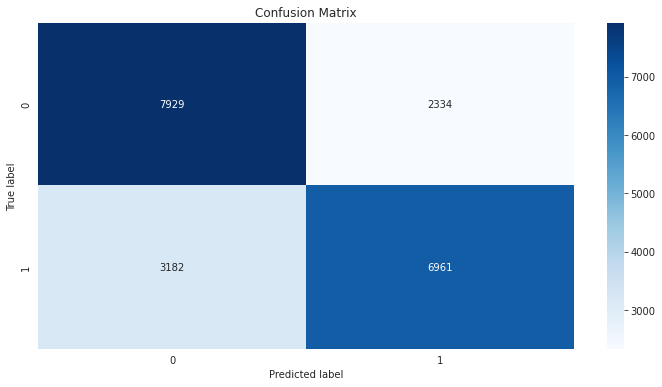

In [ ]:
# gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# configurar o título e os rótulos dos eixos
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
# Definir o nome do arquivo onde o modelo será salvo
filename = 'rf.pkl'

# Salvar o modelo no arquivo especificado
pickle.dump(best_model, open(filename, 'wb'))

## XGBOOST

In [ ]:
# start_time = time.time()  # Registra o tempo de início

# # Definir a grade de hiperparâmetros para ajustar
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2]
# }

# # Criar o modelo base
# xgb_model = xgb.XGBClassifier()

# # Realizar a busca exaustiva sobre a grade de hiperparâmetros
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# # Ajustar o modelo com os dados de treinamento
# grid_search.fit(X_train, y_train)

# # Exibir os melhores hiperparâmetros encontrados
# print("Best hyperparameters: ", grid_search.best_params_)

# # Prever os resultados para os dados de teste utilizando o modelo com os melhores hiperparâmetros
# y_pred = grid_search.predict(X_test)

# end_time = time.time()  # Registra o tempo de término
# total_time = end_time - start_time  # Calcula o tempo total de execução


# print("Tempo de execução: {:.2f} segundos".format(total_time))

In [ ]:
# Definir os parâmetros do modelo
params = {
    'gamma': 0.2,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 200
}

# Criar um objeto de modelo com os parâmetros especificados
best_model = xgb.XGBClassifier(**params)

# Ajustar o modelo aos seus dados de treinamento (X_train, y_train)
best_model.fit(X_train, y_train)

# Gerar previsões para os dados de teste usando o modelo ajustado
y_pred = best_model.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)

# Imprimir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10263
           1       0.75      0.70      0.72     10143

    accuracy                           0.73     20406
   macro avg       0.73      0.73      0.73     20406
weighted avg       0.73      0.73      0.73     20406



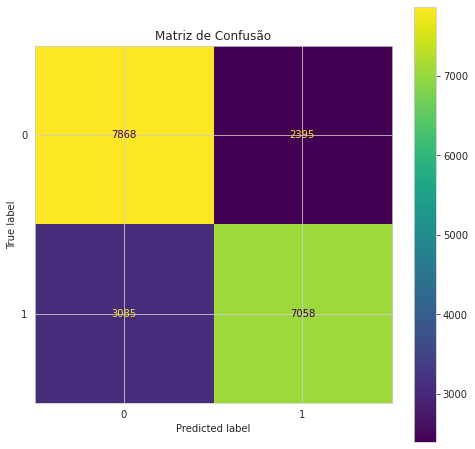

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um objeto de figura para o gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Plotar a matriz de confusão
plot_confusion_matrix(best_model, X_test, y_test, ax=ax)

# Adicionar um título ao gráfico
ax.set_title("Matriz de Confusão")

# Exibir o gráfico
plt.show()

In [ ]:
with open('modelo_xgboost.pkl', 'wb') as f:
    pickle.dump(best_model, f)